<a href="https://colab.research.google.com/github/BrayCal/Tarea-2-metodos-3/blob/main/Tarea2_Metodos3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Programada #2
Médotos matematicos de Física III FS-0633

Bryton Ramírez Calderón. C06300


## Problema #1


 1.1
Se nos solicita primeramente gráficar los polinomios de Laguerre de $L_0​(x)$ a $L_3(x)$ con un x > 0

Por lo que vamos a importamos la opción de laguerre y realizamos un for para obtener los polinomios y finalmente los ploteamos para obtener la gráfica.

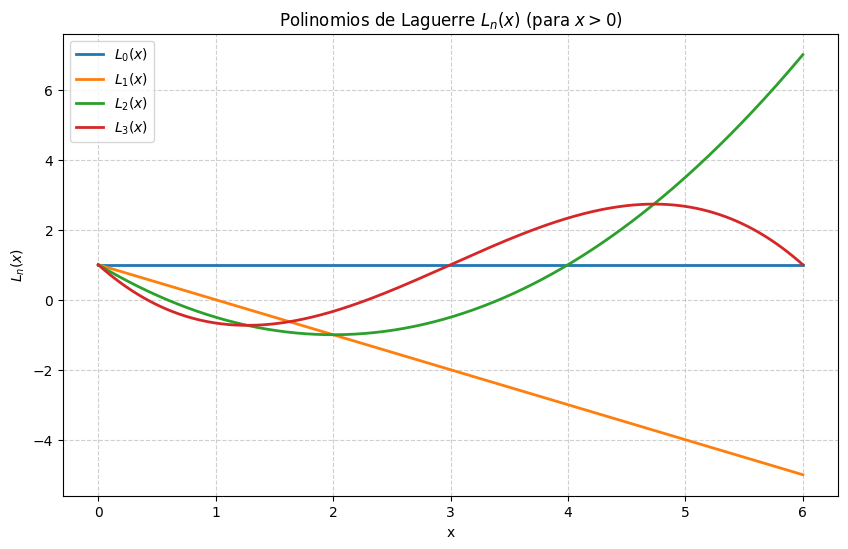

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_laguerre

x = np.linspace(0, 6, 500)  # Intervalo x > 0

plt.figure(figsize=(10, 6))
for n in range(4):
    y = eval_laguerre(n, x)
    plt.plot(x, y, label=f'$L_{n}(x)$', linewidth=2)

plt.title('Polinomios de Laguerre $L_n(x)$ (para $x > 0$)')
plt.xlabel('x')
plt.ylabel('$L_n(x)$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

#### 1.2
De forma analoga realizamos la gráfica de los polinomios de Hermite: $H_0(x)$ a $H_3(x)$ en valores neg y pos de x.
Al igual que en el 1.1 importamos eval_hermite para obtener los polinomios y los gráficamos, importante limitar el rango de y para que se puedan apreciar mejor.

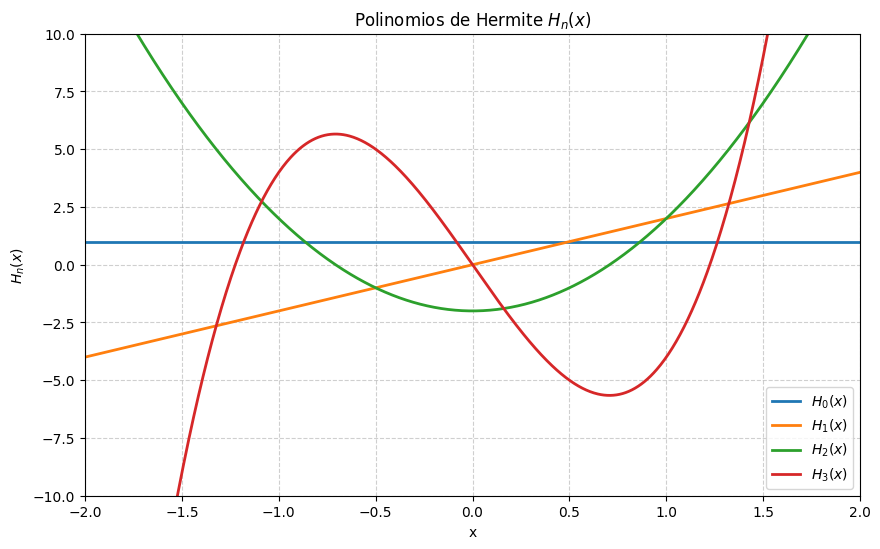

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_hermite

x = np.linspace(-2, 2, 1000)

plt.figure(figsize=(10, 6))
for n in range(4):
    y = eval_hermite(n, x)
    plt.plot(x, y, label=f'$H_{n}(x)$', linewidth=2)

plt.title('Polinomios de Hermite $H_n(x)$')
plt.ylim(-10, 10)
plt.xlim(-2, 2)
plt.xlabel('x')
plt.ylabel('$H_n(x)$')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

#### 1.3
Debemos gráficar las funciones de Bessel $J_0(x)$ a $J_4(x)$

Para ello utilizamos scipy y con obtenemos los polinomios y delimitamos solo para x > 0

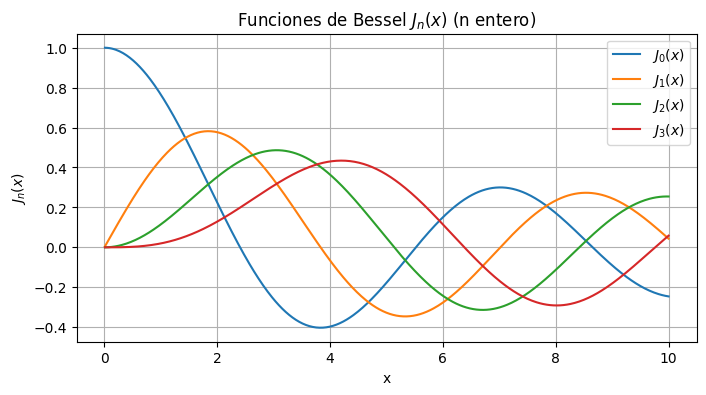

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

x = np.linspace(0.01, 10, 500)

plt.figure(figsize=(8, 4))
for n in range(4):
    plt.plot(x, jv(n, x), label=f'$J_{n}(x)$')

plt.title('Funciones de Bessel $J_n(x)$ (n entero)')
plt.xlabel('x')
plt.ylabel('$J_n(x)$')
plt.grid()
plt.legend()
plt.show()

#### 1.4
Ahora graficamos las funciones de Bessel en fracciones, por lo que debemos definir unos valores de x para evaluarlo en la version de scipy.

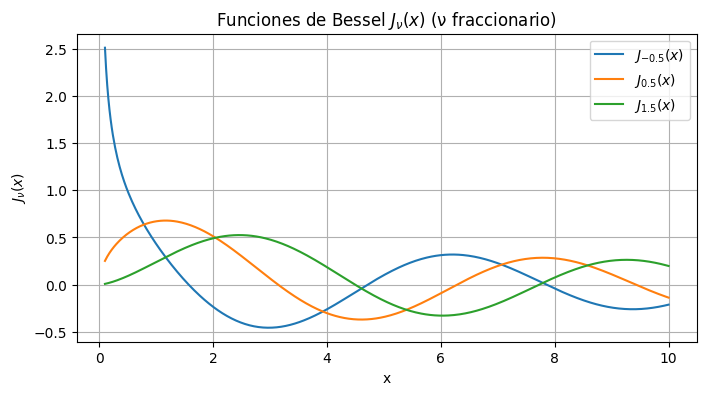

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

x = np.linspace(0.1, 10, 500)  # Intervalo adecuado para ν fraccionario

plt.figure(figsize=(8, 4))
for nu in [-0.5, 0.5, 1.5]:
    plt.plot(x, jv(nu, x), label=f'$J_{{{nu}}}(x)$')

plt.title('Funciones de Bessel $J_ν(x)$ (ν fraccionario)')
plt.xlabel('x')
plt.ylabel('$J_ν(x)$')
plt.grid()
plt.legend()
plt.show()

#### 1.5
Se nos solicita comparar la funcion de Bessel: $J_n(x)$ y $Y_n(x)$ ambas con n = 1/2

La funcion $J_n(x)$ la calculamos en el punto anterior, por lo que solo debemos obtener el valor de $Y_n(x)$ y con scipy yv pa podemos conseguir.

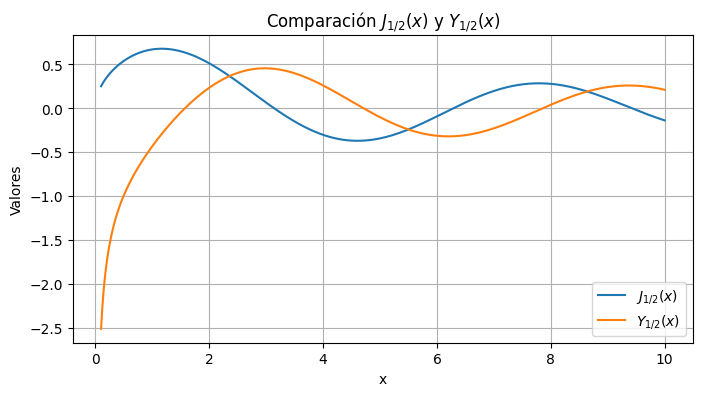

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv, yv

x = np.linspace(0.1, 10, 500)

plt.figure(figsize=(8, 4))
plt.plot(x, jv(0.5, x), label='$J_{1/2}(x)$')
plt.plot(x, yv(0.5, x), label='$Y_{1/2}(x)$')

plt.title('Comparación $J_{1/2}(x)$ y $Y_{1/2}(x)$')
plt.xlabel('x')
plt.ylabel('Valores')
plt.grid()
plt.legend()
plt.show()

#### 1.6
Se nos piden una serie de funciones de Hankel esfericas de primera especia estan dads por la suma: $j_n(x)$ $+$ $iy_n(x)$ es decir las esfericas de Bessel, y las de segunda especia son el resultado de la resta: $j_n(x)$ $-$ $iy_n(x)$
Por lo que utilizamos scipy añadiendo un spherical para que sean las que buscamos y realiazmos las operaciones para poder obtener la gráfica solicitada.

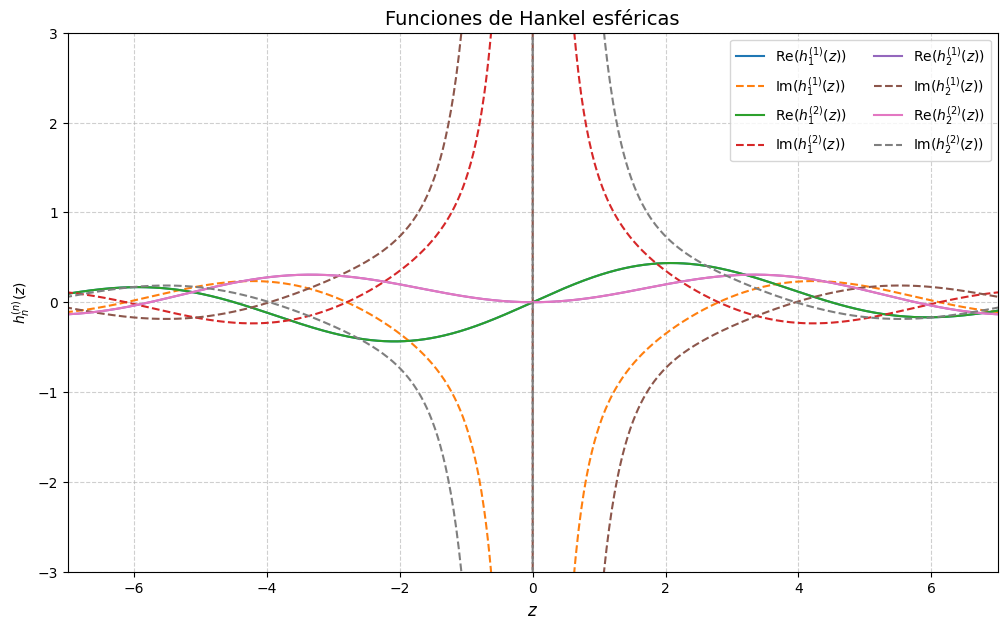

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn, spherical_yn

z = np.linspace(-10, 10, 1000)

def h1(l, z):
    return spherical_jn(l, z) + 1j * spherical_yn(l, z)

def h2(l, z):
    return spherical_jn(l, z) - 1j * spherical_yn(l, z)

fig, ax = plt.subplots(figsize=(12, 7))

for l in [1, 2]:
    h1_z = h1(l, z)
    h2_z = h2(l, z)

    ax.plot(z, np.real(h1_z), '-',  label=fr'$\mathrm{{Re}}(h^{{(1)}}_{l}(z))$')
    ax.plot(z, np.imag(h1_z), '--', label=fr'$\mathrm{{Im}}(h^{{(1)}}_{l}(z))$')
    ax.plot(z, np.real(h2_z), '-',  label=fr'$\mathrm{{Re}}(h^{{(2)}}_{l}(z))$')
    ax.plot(z, np.imag(h2_z), '--', label=fr'$\mathrm{{Im}}(h^{{(2)}}_{l}(z))$')

ax.set_xlim(-7, 7)
ax.set_ylim(-3, 3)
ax.set_xlabel('$z$', fontsize=12)
ax.set_title('Funciones de Hankel esféricas', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_ylabel('$h^{(n)}_n(z)$')
ax.legend(ncol=2, fontsize=10)
plt.show()

## Problema #2
 Demuestre gráficamente que dos polinomios dados de (a) Leguendre y (b) Chebyshev son ortogonales. Para ello siga los pasos:
- Elija dos combinaciones difenrentes de l,m para $P_l(x)$, $P_m(x)$
- Haga el producto de ambas y no olvide la función peso.
- Grafique ese producto en intervalo de ortogonalidad.
- Explique gráficamente por qué la integral de esa gráfica es cero.
- Repita el procedimiento con los polinomios de Chebyshev.


(a) Primeramente para los polinomios de Legendre tomamos losvalores de l = 1 y m = 2
Donde la funcion peso es: $w(x) = 0$

Por lo que para confirmar la ortgonalidad tenemos la siguiente integral (3° pregunta examen):

$\int_{-1}^1 P_l(x)P_m(x)dx = 0$; si $n \neq m$

Tal que tenemos lo siguientes polinomios:

$\begin{align*}
P_1(x) &= x \\
P_2(x) &= \frac{1}{2}(3x^2 - 1) \\
P_1(x)P_2(x) &= \frac{3x^3}{2} - \frac{x}{2}
\end{align*}$

Integral del producto P1*P2: -0.00


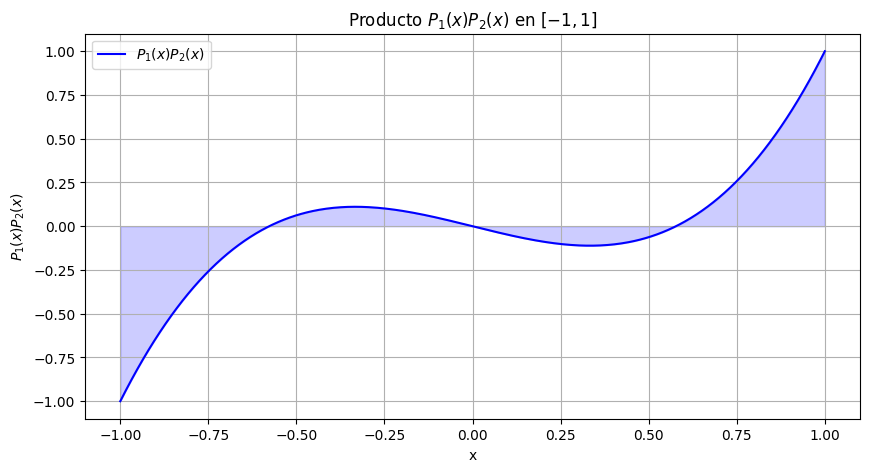

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre
from scipy.integrate import quad

x = np.linspace(-1, 1, 500)
P1 = legendre(1)(x)
P2 = legendre(2)(x)
product = P1 * P2

plt.figure(figsize=(10, 5))
plt.plot(x, product, label='$P_1(x) P_2(x)$', color='blue')
plt.fill_between(x, product, alpha=0.2, color='blue')
plt.title('Producto $P_1(x) P_2(x)$ en $[-1, 1]$')
plt.xlabel('x')
plt.ylabel('$P_1(x) P_2(x)$')
plt.grid(True)
plt.legend()

integral, _ = quad(lambda x: legendre(1)(x) * legendre(2)(x), -1, 1)
print(f"Integral del producto P1*P2: {integral:.2f}")  # Debe ser ≈ 0
plt.show()

(b) Para el caso de los polinomios de Chebyshev tomamos los mismo valores de l,m pero la función peso en este caso es:

$w(x) = \frac{1}{\sqrt{1-x^2}}$

Por lo tanto nos quedan la siguiente integral de ortogonalidad:

$\int_{-1}^1 \frac{T_l(x)T_m(x)}{\sqrt{1-x^2}}dx = \frac{\pi}{2}\delta_{lm} \quad (l,m \neq 0)$

Integral del producto T1*T2 con peso: 0.00


<ipython-input-110-7d8e5bc614bf>:5: RuntimeWarning: divide by zero encountered in divide
  weight = 1 / np.sqrt(1 - x**2)


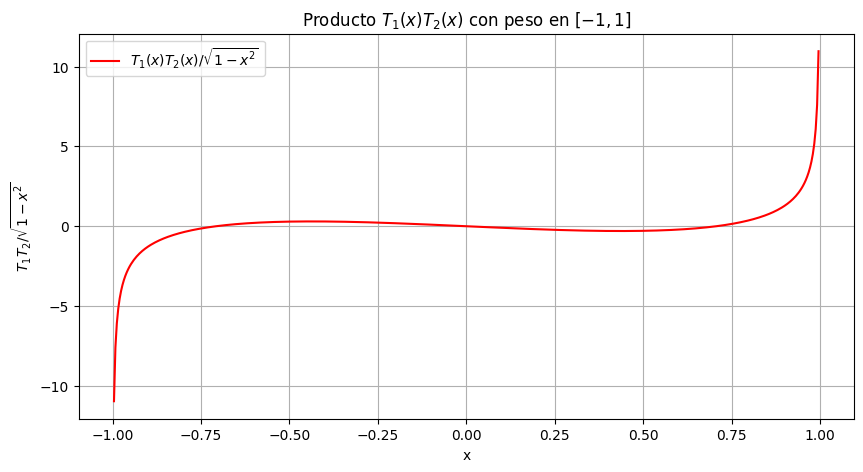

In [110]:
from scipy.special import chebyt

T1 = chebyt(1)(x)  # T_1(x) = x
T2 = chebyt(2)(x)  # T_2(x) = 2x² - 1
weight = 1 / np.sqrt(1 - x**2)
product_cheb = T1 * T2 * weight

plt.figure(figsize=(10, 5))
plt.plot(x, product_cheb, label='$T_1(x) T_2(x) / \sqrt{1 - x^2}$', color='red')
plt.title('Producto $T_1(x) T_2(x)$ con peso en $[-1, 1]$')
plt.xlabel('x')
plt.ylabel('$T_1 T_2 / \sqrt{1 - x^2}$')
plt.grid(True)
plt.legend()

# Calculamos la integral
integral_cheb, _ = quad(lambda x: chebyt(1)(x) * chebyt(2)(x) / np.sqrt(1 - x**2), -1, 1)
print(f"Integral del producto T1*T2 con peso: {integral_cheb:.2f}")
plt.show()

## Problema #3
- Haga una función que imprima una lista de índices posibles de la función asociada de Legendre dado un valor $l$. Sugerencia de presentación: haga que el formato de impresión sea como $P_{l}^{m} (x)$, es decir, p.ej., $P_1^0 (x)$
- Liste todos los armónicos esféricaos para $l= 1,2,3,4$ (esto es, imprima las funcions de forma indicada como el punto anterior)

- Haga una gráfica tridimensional de la parte real de los armónicos esféricos $l=3, m=$ y $l=2, m=-2$. Sugerencia: Esta gráfica de 3D de forma paramétrica con ax.plot_surface() y colorear los puntos pasándole a está función el argumento facecolors=cm.seimic(colors) donde colors es la parte real normalizada de armínico esférico por graficar.

Primero relizamos la lista de los indices posibles con lo formato solicitado:

In [119]:
def ind_legen(l_max):
    print("Funciones asociadas de Legendre P_l^m(x):")
    for l in range(l_max + 1):
        for m in range(-l, l + 1):
            print(f"P_{l}^{m}(x)", end="  ")
        print()

ind_legen(3)

Funciones asociadas de Legendre P_l^m(x):
P_0^0(x)  
P_1^-1(x)  P_1^0(x)  P_1^1(x)  
P_2^-2(x)  P_2^-1(x)  P_2^0(x)  P_2^1(x)  P_2^2(x)  
P_3^-3(x)  P_3^-2(x)  P_3^-1(x)  P_3^0(x)  P_3^1(x)  P_3^2(x)  P_3^3(x)  


Para la segunda parte del problema debemos listar los armónicos solicitados,
de forma: $Y_l^m$ para $l = 1$ hasta $l=4$.


In [138]:
from sympy import Ynm, symbols, latex

def armo_esf(l_max):
    print("Armónicos esféricos Y_l^m:")
    theta, phi = symbols('theta phi')
    for l in range(1, l_max + 1):
        print(f"\nPara l = {l}:")
        for m in range(-l, l + 1):
            y = Ynm(l, m, theta, phi)
            print(f"Y_{l}^{m} = {latex(y)}")

armo_esf(4)

Armónicos esféricos Y_l^m:

Para l = 1:
Y_1^-1 = - e^{- 2 i \phi} Y_{1}^{1}\left(\theta,\phi\right)
Y_1^0 = Y_{1}^{0}\left(\theta,\phi\right)
Y_1^1 = Y_{1}^{1}\left(\theta,\phi\right)

Para l = 2:
Y_2^-2 = e^{- 4 i \phi} Y_{2}^{2}\left(\theta,\phi\right)
Y_2^-1 = - e^{- 2 i \phi} Y_{2}^{1}\left(\theta,\phi\right)
Y_2^0 = Y_{2}^{0}\left(\theta,\phi\right)
Y_2^1 = Y_{2}^{1}\left(\theta,\phi\right)
Y_2^2 = Y_{2}^{2}\left(\theta,\phi\right)

Para l = 3:
Y_3^-3 = - e^{- 6 i \phi} Y_{3}^{3}\left(\theta,\phi\right)
Y_3^-2 = e^{- 4 i \phi} Y_{3}^{2}\left(\theta,\phi\right)
Y_3^-1 = - e^{- 2 i \phi} Y_{3}^{1}\left(\theta,\phi\right)
Y_3^0 = Y_{3}^{0}\left(\theta,\phi\right)
Y_3^1 = Y_{3}^{1}\left(\theta,\phi\right)
Y_3^2 = Y_{3}^{2}\left(\theta,\phi\right)
Y_3^3 = Y_{3}^{3}\left(\theta,\phi\right)

Para l = 4:
Y_4^-4 = e^{- 8 i \phi} Y_{4}^{4}\left(\theta,\phi\right)
Y_4^-3 = - e^{- 6 i \phi} Y_{4}^{3}\left(\theta,\phi\right)
Y_4^-2 = e^{- 4 i \phi} Y_{4}^{2}\left(\theta,\phi\right)
Y_4^-1 = - 

Para la parte final debemos hacer la gráfica 3D de la parte real de los armonicos esfericos con  $l=3, m=$ y $l=2, m=-2$.
Por lo que seguiremos la sugerencia del ejercicio, definimos la grafica y cambiamos a coordenadas esfericas (obviamente), para luego calcular los armonicos y "plotearlos" en las gráficas.

<ipython-input-145-38e8895ce29e>:15: DeprecationWarning: `scipy.special.sph_harm` is deprecated as of SciPy 1.15.0 and will be removed in SciPy 1.17.0. Please use `scipy.special.sph_harm_y` instead.
  Y = sph_harm(m, l, phi, theta).real


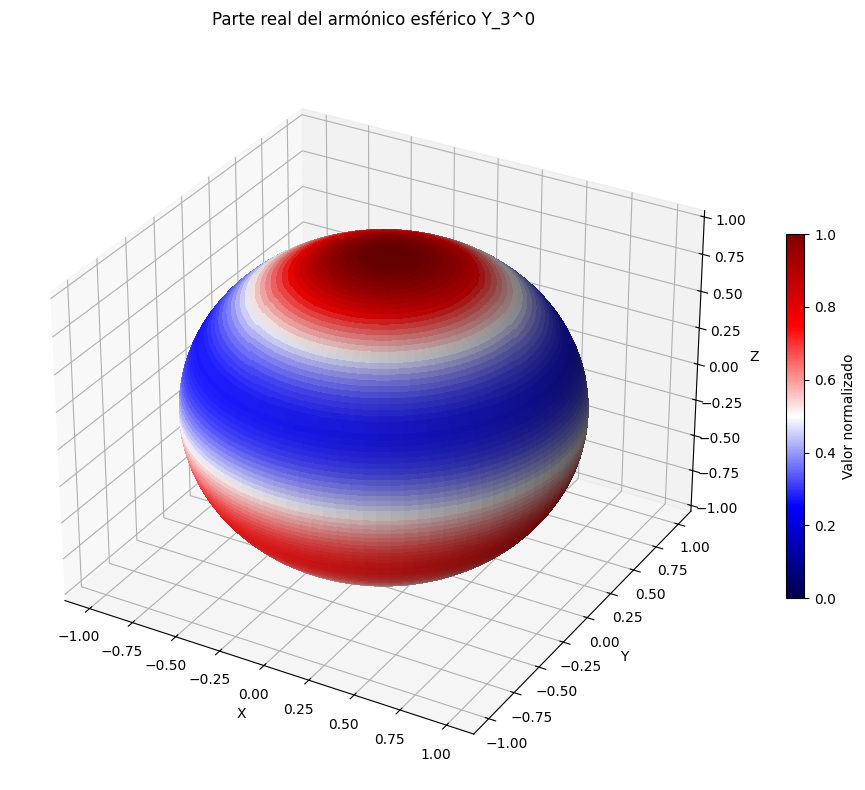

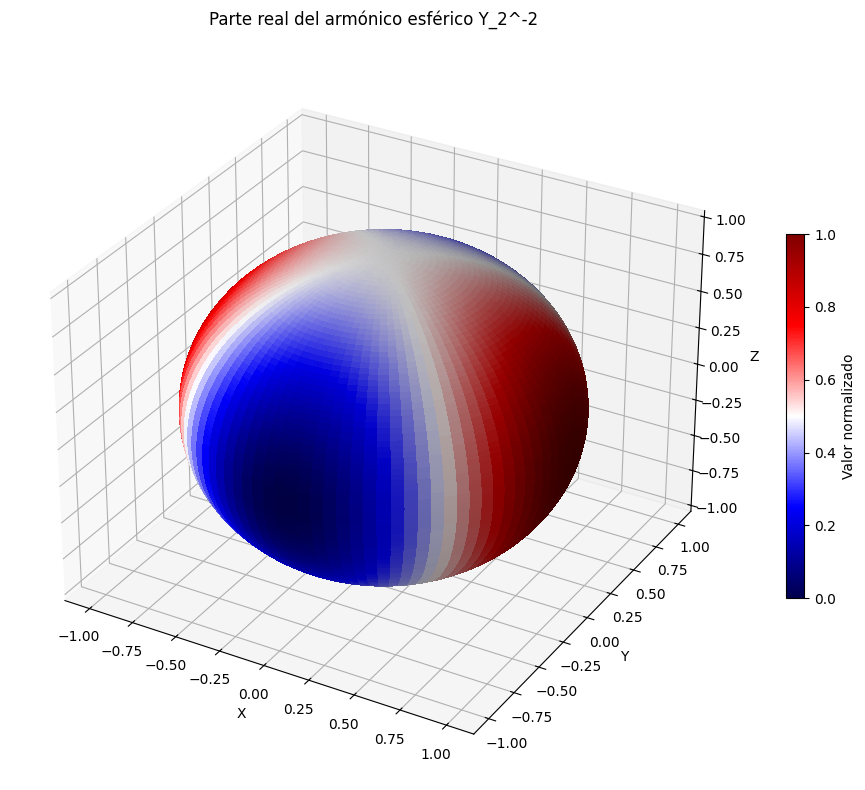

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D

def graf_armonico(l, m):
    theta = np.linspace(0, np.pi, 100)
    phi = np.linspace(0, 2*np.pi, 100)
    theta, phi = np.meshgrid(theta, phi)
    #Cambiamos las cordenadas a esfericas (obviamente)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)

    Y = sph_harm(m, l, phi, theta).real
    Y_normalized = (Y - Y.min()) / (Y.max() - Y.min())


    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x, y, z, facecolors=cm.seismic(Y_normalized), rstride=1, cstride=1, linewidth=0, antialiased=False)
    ax.set_title(f"Parte real del armónico esférico Y_{l}^{m}", pad=20)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    m = cm.ScalarMappable(cmap=cm.seismic)
    m.set_array(Y_normalized)
    plt.colorbar(m, ax=ax, shrink=0.5, label='Valor normalizado')

    plt.tight_layout()
    plt.show()
graf_armonico(3, 0)
graf_armonico(2, -2)

# Problema 4:
Considere el problema 1 del segundo examen parcial con $f(r) = J_0(k_{00}r), v=1, a=2$. Gráfique $z(r,t)$ para varios valores de $t$ (usted los elige). ¿Ve cómo vibra la membrana del tambor?

###El enunciado del problema 1 del segundo parcial dice:
La membrana de un tambor de densidad superficial $\sigma$ está sujeta a una tensión $F_T$. Al hacer una suma de fuerzas en un elemento de superficie, resulta que la posición vertical $z(r,\theta,t)\ \epsilon  \ \mathbb{R}$ de cada elemento de la membrana puede encontrarse por medio de la ecuación diferencial en derivadas parciales:

\$\nabla^2z = \frac{1}{v^2}\frac{\partial^2z}{\partial t^2}$

Donde r es la posición radial cilindrica del elemento, \theta es un ángulo polar de coordenadas cilíndricas, tes el tiempo y $v^2 = \frac{F_T}{\sigma}$, todos reales.

Considere la membrana de un tambor circular de radio a. Cuando $t=0$, un golpe le da una forma $z(r,\theta,t=0) = f(r)$, y una velocidad $\partial_tz(r,\theta,t=0)=0$. La membrana del tambor está fija a un contorno circular, por lo que el borde de la membrana no se desplaza verticalmente nunca.

### Primeramente tenemos que utlizar la condición tal que: $f(r) = J_0(k_{00}r)$

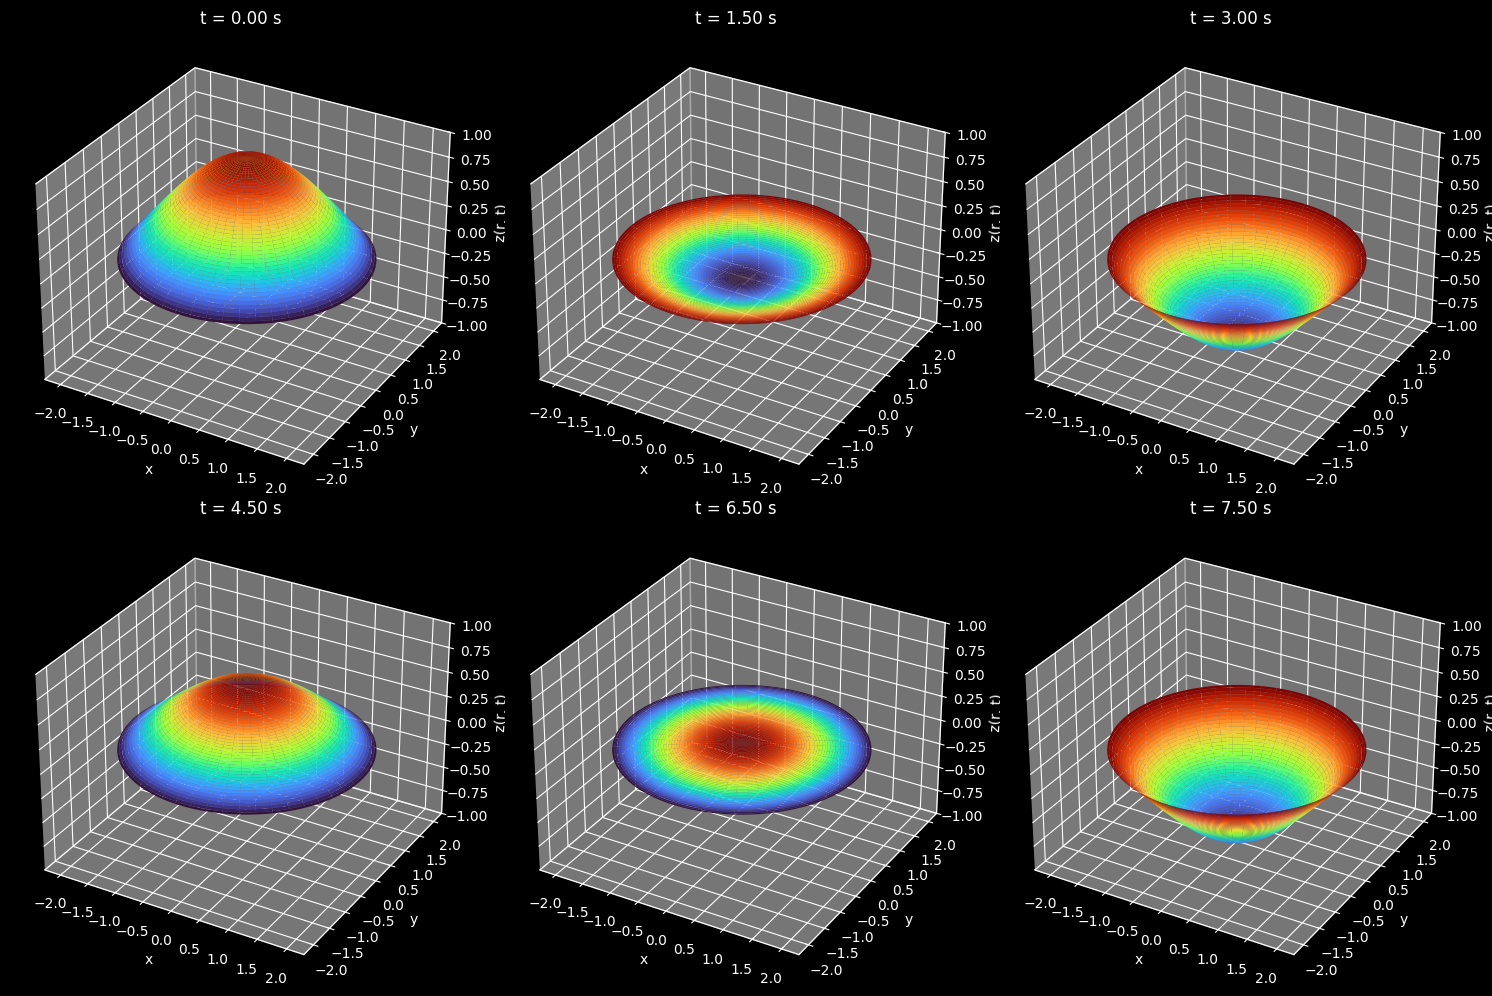

In [192]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn_zeros, j0
from mpl_toolkits.mplot3d import Axes3D

a = 2
v = 1
k00 = jn_zeros(0, 1)[0] / a

r = np.linspace(0, a, 200)
theta = np.linspace(0, 2*np.pi, 200)
R, Theta = np.meshgrid(r, theta)

X = R * np.cos(Theta)
Y = R * np.sin(Theta)


t = [0, 1.5, 3, 4.5, 6.5, 7.5]

fig = plt.figure(figsize=(15, 10))

for i, t in enumerate(t, 1):
    Z = j0(k00 * R) * np.cos(v * k00 * t)

    ax = fig.add_subplot(2, 3, i, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='turbo', edgecolor='none')
    ax.set_title(f"t = {t:.2f} s")
    ax.set_zlim(-1, 1)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z(r, t)")

plt.tight_layout()
plt.show()

#Problema 5:
#####- Calcule el perímetro de una elipse con semieje mayor $a = 8$ y semieje menos $b = 4$, utilizando la integral elíptica que corresponda (puede encontrar una implementeación en scipy).

#####- Considere un Péndulo largo $l = 0.8 m$ cuya masa puntual se suelta desde $\theta_0 = 70°$ (ese ángulo se mide desde la horizontal).
  (a) Calcule el periodo de ese péndulo en segundos por medio de la integral elíptica que corresponda.
  
  (b) Repita el cálculo con $\theta_0 = 6°$.
  
  (c) Para ambos ángulos iniciales, calcule el error relativo al periodo calculado con el péndulo simple.


Para la primera parte del problema realizamos una integral eliptia para calcular un perimetro. Donde el perímetro de una elipse se puede aproximar mediante la integral elíptica completa del segundo tipo, tal que:

$P = 4a⋅E(e)$

En donde la $E$ es la integral de la forma:
$E(k) = \int_0^{\frac{\pi}{2}} \sqrt{1 - k^2 \sin^2 \theta} d\theta$

Mientras la $e$ corresponde a la excentricidad, la cuál esta dada por la siguiente expreción:
 $e = \sqrt{1- \frac{b^2}{a^2}}$

Utilizando scipy encontramos la función "ellipe" siendo esta la de segunda especie lo que nos permite la integral con mucha mayor facilidad.


In [154]:
import numpy as np
from scipy.special import ellipe

a = 8
b = 4
e = np.sqrt(1 - (b/a)**2)
perimetro = 4 * a * ellipe(e**2)

print(f"Perímetro de la elipse: {perimetro:.4f} (No dice unidades)")

Perímetro de la elipse: 38.7538 (No dice unidades)


En la segunda parte debemos calcular el periodo de ambos pendulo por medio de las integrales, en donde el periodo de un pendulo está dado por medio de:
$\tau = 4\sqrt{\frac{ℓ}{g}}\cdot K(k)$

Siendo $K(k)$ una integral eliptica de primera especie, en donde tiene la forma de: $K(k) = \int_0^{\frac{\pi}{2}} \frac{1}{\sqrt{1 - k^2 \sin^2 \theta}} \, d\theta$   ; con $k = sin(\frac{\theta_0}{2})$

En scipy tenemos la función "ellipk" siendo esta el caso para las de primera especie facilitando complentamente los calculos.


(a). Tenemos que se deja caer de un ángulo: $\theta_0 = 70°$ el cuál lo convertimos a radianes y posee una longitud de 0.8m

In [159]:
from scipy.special import ellipk
import math

g = 9.81
l = 0.8
rad_70 = math.radians(70)
k_70 = math.sin(rad_70/2)

T_70 = 4 * math.sqrt(l/g) * ellipk(k_70**2)
print(f"Periodo para θ₀=70°: {T_70:.6f} segundos")

Periodo para θ₀=70°: 1.977557 segundos


(b). Tenemos que se deja caer de un ángulo: $\theta_0 = 6°$ de igual forma lo convertimos en rads y posee la misma l

In [162]:
rad_06 = math.radians(6)
k_6 = math.sin(rad_06/2)
g = 9.81
l = 0.8

T_6 = 4 * math.sqrt(l/g) * ellipk(k_6**2)
print(f"Periodo para θ₀=06°: {T_6:.6f} segundos")

Periodo para θ₀=06°: 1.795511 segundos


(c). Ahora calculamos el error relativo al periodo con el péndulo simple.

El periodo de un pendulo simple esta dado por la formula:
$\tau = 2\pi \sqrt{\frac{\ell}{g}}$, siendo esta valida cuando el ángulo inicial es pequeño
Por lo que vamos a calcular el perido de ambos péndulos con la ecuación anterior y comparamos con la ecuación de error que apredemos en los laboratorio:

$
\text{Error} = \left| \frac{T_{\text{eliptica}} - T_{\text{simple}}} {T_{\text{simple}}} \right| \times 100$



In [165]:
T_simple = 2 * math.pi * math.sqrt(l/9.81)

error_70 = abs(T_70 - T_simple)/T_simple * 100
error_6 = abs(T_6 - T_simple)/T_simple * 100

print(f"\nError relativo:")
print(f"Para θ₀=70°: {error_70:.2f}%")
print(f"Para θ₀=6°: {error_6:.4f}%")


Error relativo:
Para θ₀=70°: 10.21%
Para θ₀=6°: 0.0686%


Vamos que efectivamente el error con el caso de 70° es bastante más grande, debido a que la ecuación del péndulo simple solo es aplicable en ángulos pequeños, cosa que observamos un error super pequeño con el caso de 6°.

#Problema 6
Considere el ejemplo 11.4.4 de las notas de Heidy (solución de la ecuación de difusión en 1D)
Tomando en cuenta términos hasta de orden $n=5$ en la expresión final para la solución completa $u(x,t)$

- Reproduzca el panel derecho de la figura 11.10. Puede en su lugar graficar $u(x)$ para varios valores de $t$, si le parece más fácil.
- Para $t=2$s, calcule el error relativo al límite dado para $t\to \infty$, es decir, $u(x,t\to \infty) = T_0x/ℓ$


---



#### El ejemplo 11.4.4 de las notas de Heidy dice:

La temperatura de una barra aislada de longitud $\ell$, satisface las condiciones de frontera $u(0,t)=0$, $u(\ell,t)=T_0$, y la condición inicial $u(x,0) = T_0sin(\frac{\pi x}{\ell})$. La distribución de temperatura es uniforme respecto al area trasversal de la barra, de forma que solo existe variación en una dimensión. Determine para esta barra:
1. La distribución de temperatura despues de un tiempo t.
2. La temperatura en estado estacionario.

Colocamos las condiciones indicadas además, de que las gráficas tomamos la alternativa un poco mas fácil ya que no estuve seguro, dando las siguientes 2 gráficas:

---



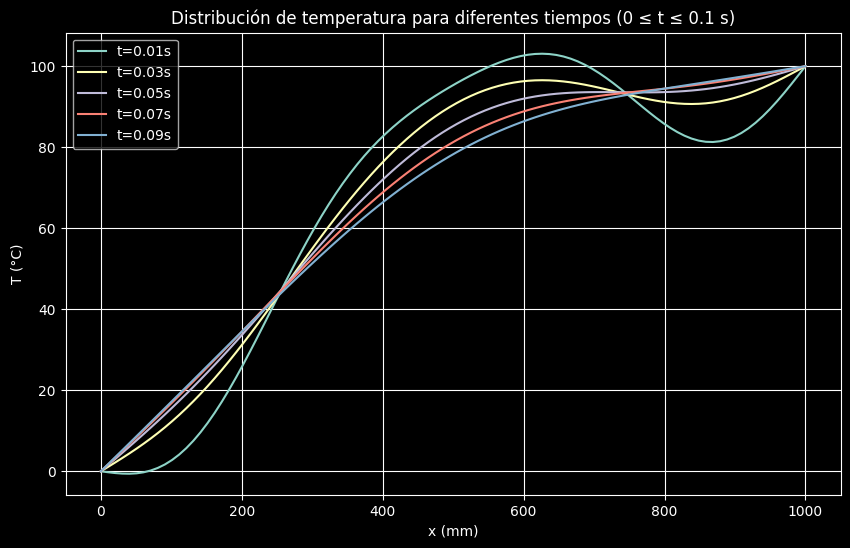

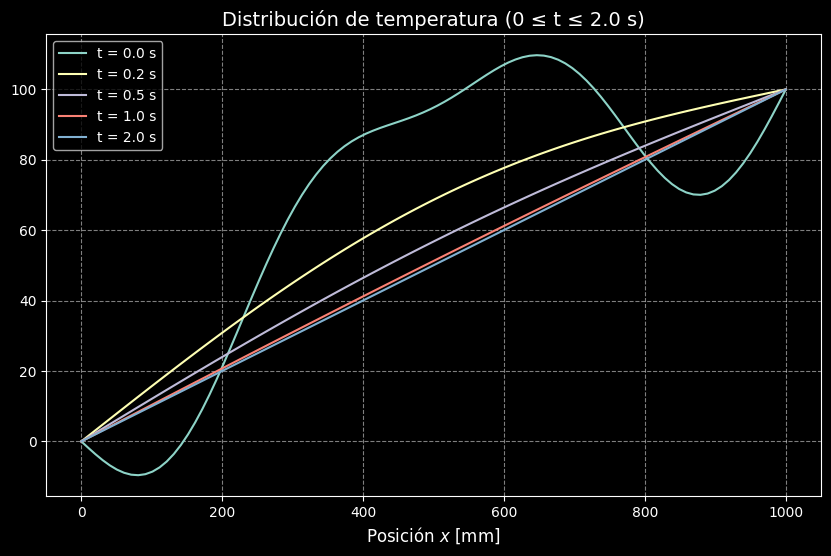

In [266]:
import numpy as np
import matplotlib.pyplot as plt

T0 = 100
l = 1.0
alpha2 = 0.34

def u_xt(x, t, terms=5):
    ste = T0 * x / l
    tsn = 0
    for n in range(1, terms+1, 2):
        if n == 1:
            Bn = T0 - 2*T0/np.pi
        else:
            Bn = -2*T0/(n*np.pi)
        exp = -(alpha2 * (n*np.pi/l)**2 * t)
        tsn += Bn * np.sin(n*np.pi*x/l) * np.exp(exp)

    return ste + tsn

x = np.linspace(0, l, 100)
t = [0.01, 0.03, 0.05, 0.07, 0.09]

plt.figure(figsize=(10, 6))
for t in t:
    u = [u_xt(xi, t) for xi in x]
    plt.plot(x*1000, u, label=f't={t}s')

plt.xlabel('x (mm)')
plt.ylabel('T (°C)')
plt.title('Distribución de temperatura para diferentes tiempos (0 ≤ t ≤ 0.1 s)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))

times_long = [0, 0.2, 0.5, 1.0, 2.0]
for t in times_long:
    u = [u_xt(xi, t) for xi in x]
    plt.plot(x*1000, u, label=f't = {t:.1f} s')

plt.xlabel('Posición $x$ [mm]', fontsize=12)
plt.title('Distribución de temperatura (0 ≤ t ≤ 2.0 s)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



Parte 2.
Tenemos que calcular el error reslativo respecto a un $t\to \infty $
Para la cuál volvemos a utilizar la ecuacion del error:

$\text{Error} = \left| \frac{T_{t=2} - T_{t \to \infty}}{T_{t \to \infty}} \right| \times 100$


In [270]:
x_vals = np.linspace(0.1, l, 11)
u_inf = T0 * x_vals / l
u_2s = np.array([u_xt(x, 2.0) for x in x_vals])
error_rel = np.abs(u_2s - u_inf) / np.abs(u_inf)

print("Error relativo para t=2s en diferentes posiciones:")
for i in range(1, len(x_vals)):
    print(f"x = {x_vals[i]*1000:.1f} mm: {error_rel[i]*100:.4f}%")

Error relativo para t=2s en diferentes posiciones (excluyendo x=0):
x = 190.0 mm: 0.1308%
x = 280.0 mm: 0.1217%
x = 370.0 mm: 0.1097%
x = 460.0 mm: 0.0954%
x = 550.0 mm: 0.0794%
x = 640.0 mm: 0.0625%
x = 730.0 mm: 0.0454%
x = 820.0 mm: 0.0289%
x = 910.0 mm: 0.0136%
x = 1000.0 mm: 0.0000%


##Con ello termina la tarea.



---





---





---



##Anexo:
A modo de anexo dejó mi intento de la gráfica del problema 6 similar a la Figura 11.10, la cuál no estoy seguro si está correcta por ello dejé la alternativa dada por el profesor de solo graficar $u(x)$ para varios valores de t.

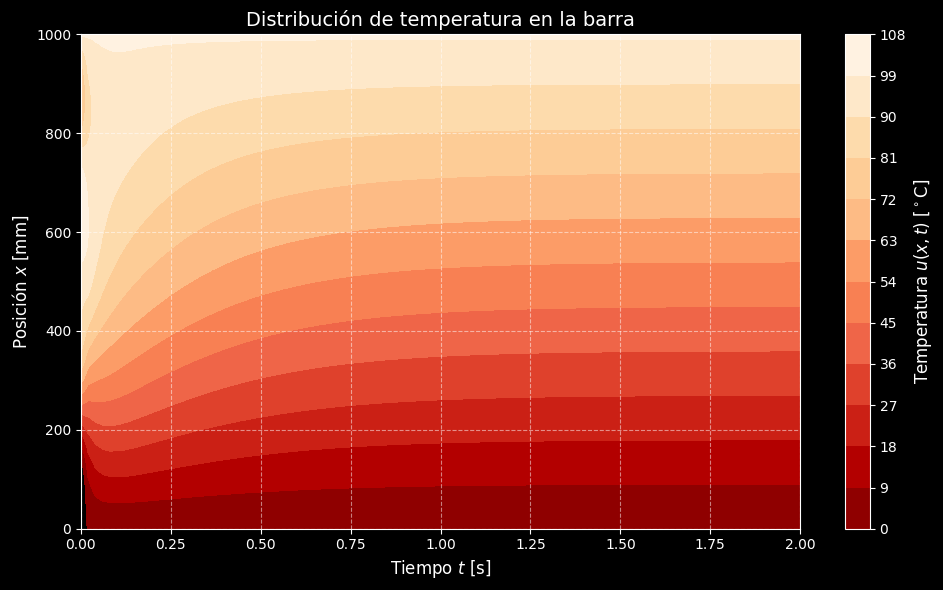

In [276]:
import numpy as np
import matplotlib.pyplot as plt

T0 = 100
l = 1.0
alpha2 = 0.34


def u_xt(x, t, terms=5):
    steady = T0 * x / l
    transient = 0.0

    for n in range(1, terms + 1, 2):
        if n == 1:
            Bn = T0 - (2 * T0 / np.pi)
        else:
            Bn = -2 * T0 / (n * np.pi)

        exponente = -alpha2 * (n * np.pi / l)**2 * t
        transient += Bn * np.sin(n * np.pi * x / l) * np.exp(exponente)

    return steady + transient


x = np.linspace(0, l, 100)
t = np.linspace(0, 2.0, 100)
X, T = np.meshgrid(x, t)
U = np.zeros_like(X)
for i in range(len(t)):
    for j in range(len(x)):
        U[i, j] = u_xt(x[j], t[i])


plt.figure(figsize=(10, 6))
levels = np.arange(0, 109, 9)

contour = plt.contourf(T, X * 1000, U, levels=levels, cmap='OrRd_r')
cbar = plt.colorbar(contour, ticks=levels)
cbar.set_label('Temperatura $u(x,t)$ [$^\circ$C]', fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.xlabel('Tiempo $t$ [s]', fontsize=12)
plt.ylabel('Posición $x$ [mm]', fontsize=12)
plt.title('Distribución de temperatura en la barra', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()